In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pycaret.classification import *

sns.set(style='white')

In [2]:
df = pd.read_csv('../01-data/taller2_MLE.csv')

In [ ]:
df

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
0,48,Preferente,43791.80,5,11,0,1,1,4.2,36.82,Medio,Sierra,0
1,36,Estándar,17940.87,1,7,0,1,0,2.2,39.78,Muy Alto,Selva,0
2,48,Estándar,9308.09,4,3,0,1,1,1.0,28.36,Medio,Sierra,1
3,30,Estándar,709.76,5,5,1,1,0,5.0,45.73,Bajo,Selva,0
4,74,Preferente,20471.46,1,4,0,0,1,3.1,39.19,Medio,Sierra,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30,Estándar,12464.23,5,4,1,0,3,2.8,27.93,Bajo,Costa,0
4996,58,Preferente,18939.17,5,3,1,1,0,2.1,34.95,Bajo,Selva,0
4997,30,Estándar,51162.08,3,3,0,1,0,2.3,35.58,Muy Alto,Sierra,0
4998,58,Estándar,14282.38,1,9,0,0,0,2.0,44.67,Medio,Selva,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   5000 non-null   int64  
 1   segmento               5000 non-null   object 
 2   saldo_total            5000 non-null   float64
 3   numero_productos       5000 non-null   int64  
 4   visitas_app_mes        5000 non-null   int64  
 5   usa_web                5000 non-null   int64  
 6   usa_tarjeta_credito    5000 non-null   int64  
 7   reclamos_6m            5000 non-null   int64  
 8   satisfaccion_encuesta  5000 non-null   float64
 9   tasa_credito_personal  5000 non-null   float64
 10  rango_ingresos         5000 non-null   object 
 11  region                 5000 non-null   object 
 12  cerrara_cuenta         5000 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 507.9+ KB


In [17]:
df['cerrara_cuenta'].value_counts(normalize=True)#.plot(kind='pie')
# plt.show()

cerrara_cuenta
0    0.8596
1    0.1404
Name: proportion, dtype: float64

In [ ]:
df

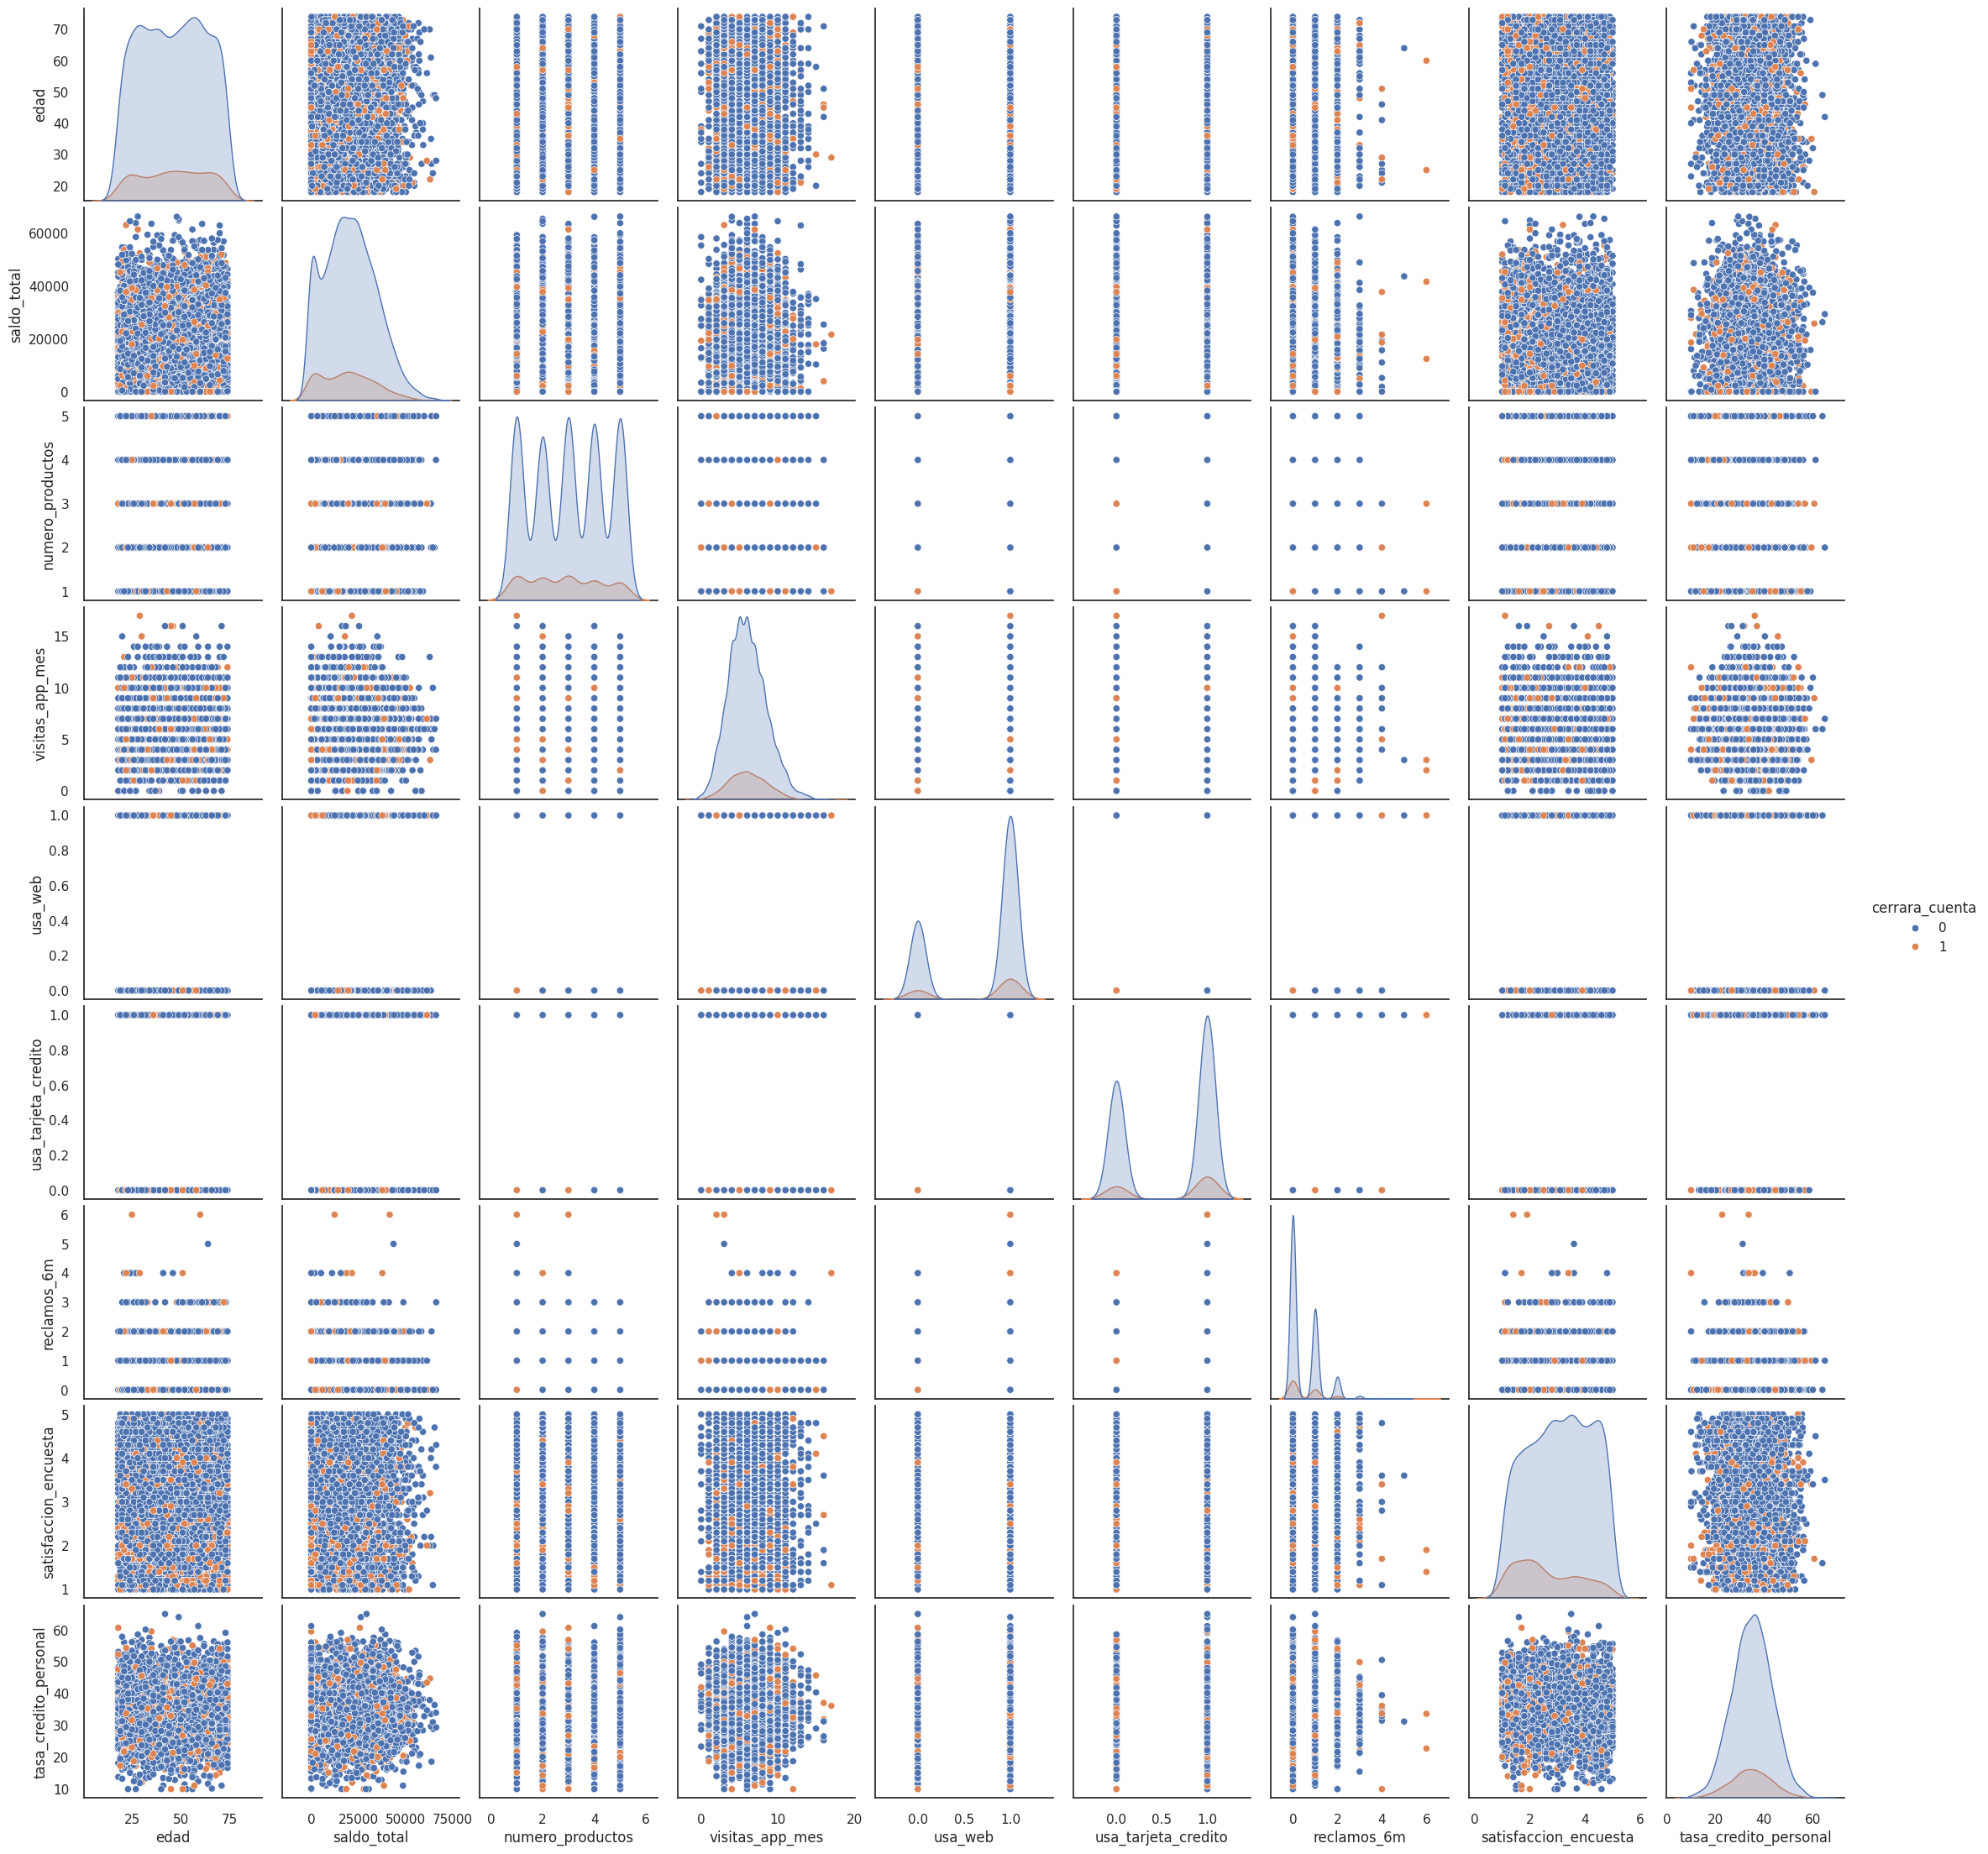

In [18]:
sns.pairplot(df, hue='cerrara_cuenta', diag_kind='kde')

In [19]:
import pandas as pd
import numpy as np

# ASUME QUE TU DATAFRAME YA ESTÁ CARGADO Y SE LLAMA 'df'
# (Necesitas incluir tus columnas categóricas convertidas para un análisis completo)

# 1. Convertir variables categóricas a numéricas para incluirlas en la correlación
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Calcular la matriz de correlación completa
correlation_matrix = df_encoded.corr()

# 3. Aislar la correlación de todas las variables con 'cerrara_cuenta'
correlation_with_target = correlation_matrix['cerrara_cuenta']

# 4. Ordenar los valores por su magnitud (valor absoluto) para ver los más fuertes
# Se usa el valor absoluto porque una correlación de -0.8 es tan fuerte como una de 0.8
sorted_correlations = correlation_with_target.abs().sort_values(ascending=False)

# 5. Imprimir los resultados, excluyendo la correlación de la variable consigo misma
print("Variables con mayor correlación (positiva o negativa) con 'cerrara_cuenta':")
print(sorted_correlations.drop('cerrara_cuenta'))

Variables con mayor correlación (positiva o negativa) con 'cerrara_cuenta':
satisfaccion_encuesta      0.139740
segmento_Preferente        0.068543
segmento_Premium           0.046536
numero_productos           0.039085
saldo_total                0.033003
reclamos_6m                0.024427
usa_tarjeta_credito        0.022564
tasa_credito_personal      0.019942
visitas_app_mes            0.012285
rango_ingresos_Muy Alto    0.009415
edad                       0.008659
region_Selva               0.007839
rango_ingresos_Bajo        0.006198
rango_ingresos_Medio       0.006127
usa_web                    0.004641
region_Sierra              0.000256
Name: cerrara_cuenta, dtype: float64


In [23]:
best = setup(
    data=df,
    target='cerrara_cuenta',
    categorical_features=['region', 'rango_ingresos', 'saldo_total', 'segmento'],
    normalize=True,
    session_id=123,
    fix_imbalance=True,
)

,Description,Value
0,Session id,123
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(7518, 20)"
5,Transformed train set shape,"(6018, 20)"
6,Transformed test set shape,"(1500, 20)"
7,Numeric features,8
8,Categorical features,4
9,Preprocess,True


In [24]:
best = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8269,0.5835,0.0937,0.2462,0.1341,0.0561,0.0668,0.0470
ridge,Ridge Classifier,0.8177,0.5719,0.0610,0.1853,0.0811,0.0052,0.0121,0.0430
lda,Linear Discriminant Analysis,0.8177,0.5719,0.0610,0.1853,0.0811,0.0052,0.0121,0.0390
lr,Logistic Regression,0.8391,0.5718,0.0631,0.2501,0.0991,0.0424,0.0568,0.4960
svm,SVM - Linear Kernel,0.8397,0.5623,0.0386,0.1732,0.0621,0.0132,0.0174,0.0470
gbc,Gradient Boosting Classifier,0.8571,0.5474,0.0102,0.4333,0.0198,0.0095,0.0421,0.2200
qda,Quadratic Discriminant Analysis,0.8280,0.5390,0.0775,0.1988,0.1104,0.0371,0.0416,0.0410
et,Extra Trees Classifier,0.8560,0.5374,0.0122,0.3667,0.0234,0.0101,0.0371,0.1260
rf,Random Forest Classifier,0.8591,0.5355,0.0000,0.0000,0.0000,-0.0011,-0.0031,0.1530
lightgbm,Light Gradient Boosting Machine,0.8560,0.5337,0.0204,0.3676,0.0381,0.0211,0.0525,101.6440


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asume que tu DataFrame original se llama 'df'

# Filtrar para obtener solo los clientes que se fueron sin reclamar
df_silent_churn = df[(df['cerrara_cuenta'] == 1) & (df['reclamos_6m'] == 0)].copy()

print(f"Número de clientes silenciosos que se fueron: {len(df_silent_churn)}")
print("\n--- Estadísticas de los clientes silenciosos que se fueron ---")
df_silent_churn.describe()

Número de clientes silenciosos que se fueron: 417

--- Estadísticas de los clientes silenciosos que se fueron ---


,edad,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,cerrara_cuenta
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.000000,417.000000,417.0
mean,46.997602,19682.240240,2.755396,6.074341,0.702638,0.635492,0.0,2.646523,34.449424,1.0
std,16.642089,14004.883988,1.403165,2.487805,0.457646,0.481870,0.0,1.134657,8.268616,0.0
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,10.000000,1.0
25%,32.000000,7543.990000,1.000000,4.000000,0.000000,0.000000,0.0,1.800000,29.340000,1.0
50%,47.000000,19344.520000,3.000000,6.000000,1.000000,1.000000,0.0,2.400000,34.890000,1.0
75%,62.000000,29840.220000,4.000000,8.000000,1.000000,1.000000,0.0,3.600000,40.050000,1.0
max,74.000000,63201.240000,5.000000,16.000000,1.000000,1.000000,0.0,5.000000,53.920000,1.0


In [29]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8314,0.6042,0.0408,0.1429,0.0635,0.0014,0.0017
1,0.8543,0.6327,0.1224,0.4286,0.1905,0.1368,0.1698
2,0.8371,0.6254,0.1429,0.3182,0.1972,0.1209,0.1330
3,0.8371,0.6088,0.1020,0.2778,0.1493,0.0801,0.0925
4,0.7800,0.5400,0.0408,0.0625,0.0494,-0.0689,-0.0709
5,0.8543,0.5897,0.1224,0.4286,0.1905,0.1368,0.1698
6,0.7943,0.5461,0.0612,0.1034,0.0769,-0.0303,-0.0317
7,0.8314,0.5781,0.1020,0.2500,0.1449,0.0694,0.0780
8,0.8257,0.5705,0.1224,0.2500,0.1644,0.0797,0.0860


In [30]:
nb_tunned = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8314,0.6042,0.0408,0.1429,0.0635,0.0014,0.0017
1,0.8543,0.6327,0.1224,0.4286,0.1905,0.1368,0.1698
2,0.8371,0.6254,0.1429,0.3182,0.1972,0.1209,0.1330
3,0.8371,0.6088,0.1020,0.2778,0.1493,0.0801,0.0925
4,0.7800,0.5400,0.0408,0.0625,0.0494,-0.0689,-0.0709
5,0.8543,0.5897,0.1224,0.4286,0.1905,0.1368,0.1698
6,0.7943,0.5461,0.0612,0.1034,0.0769,-0.0303,-0.0317
7,0.8314,0.5781,0.1020,0.2500,0.1449,0.0694,0.0780
8,0.8257,0.5705,0.1224,0.2500,0.1644,0.0797,0.0860


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
interpret_model(nb_tunned)

ValueError: Plot Not Available. Please see docstring for list of available Plots.

1. ¿Cuál es el porcentaje de clientes que cerraron su cuenta? ¿Está balanceado el dataset?
El porcentaje de los clientes que cerraron su cuenta es de 14.04%, lo cual nos indica un desbalance en la clase predictora

2. ¿Qué variables tienen mayor correlación con cerrara_cuenta?.
Las variables con mayor correlación va en este orden
satisfaccion_encuesta
segmento
numero_productos

3. ¿Cuál es el mejor modelo en AUC? ¿Y en Recall?
Naive Bayes
ROC AUC: 0.5835     RECALL: 0.0937

4. ¿Qué combinación de variables permite identificar clientes silenciosos que se van (sin reclamos)?
df[(df['cerrara_cuenta'] == 1) & (df['reclamos_6m'] == 0)]
la combinación de cerrara_cuenta = 1 y reclamos_6m = 0
nos permite identificar a los clientes silenciosos que se fueron sin hacer reclamos

5. ¿Qué pasa si el modelo predice mal un cliente que no se iba (falso positivo)? ¿Y uno que sí se iba (falso negativo)?
Un falso positivo cuesta dinero en recursos y promociones que no eran necesarias.
Un falso negativo es casi siempre el error mas grave y costoso.
En resumen, el falso negativo es casi siempre el error mas grave y costoso para una empresa.

6. ¿Qué umbral de score (default 0.5 vs optimizado por KS) deberías usar para reducir la pérdida financiera?
Para reducir la pérdida financiera, debemos usar un umbral optimizado en lugar del default de 0.5

7. ¿Cómo explicarías con SHAP que un cliente Premium con buen saldo igual fue predicho como fuga?
Al ser un modelo de regresion y no basado en arboles no se puede graficar con SHAP, ya que naive bayes fue el mejor modelo para este trabajo, pero en terminos generales, se puede explicar que aunque un cliente sea Premium y tenga buen saldo, otros factores como la insatisfacción con el servicio, la falta de productos adecuados o cambios en sus necesidades personales pueden influir en su decisión de cerrar la cuenta.

8. ¿Debería el modelo incluir la tasa de interés ofrecida como predictor, si luego esta puede cambiar según la política de retención?
No, no es recomendable incluir la tasa de interés como predictor en el modelo principal. Hacerlo crearía un problema de causalidad inversa y haría que el modelo sea menos útil para la toma de decisiones. 

9. ¿Cómo usarías este modelo en un sistema de reglas mixtas (modelo + regla de negocio) para que los gestores humanos no pierdan confianza?
La clave para que los gestores confíen en el modelo es presentarlo como una herramienta de apoyo a la decisión, no como un reemplazo autoritario. Un sistema mixto que combine la inteligencia del modelo con la experiencia humana es la mejor estrategia.
